# Naive RNN Forecast on Financial Data

### Description
This file is intended to demonstrate a simple and believably inaccurate version of RNN forecast on financial data. The data passed into the RNN model will only involve simple feature engineering.

### Imports & Settings

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [20]:
pd.options.display.max_rows = 50

### Read Data

In [21]:
# Data downloaded from investing.com and transformed by 
df = pd.read_csv('HSI Futures.csv', index_col='Date')

In [22]:
df

,Close,Open,High,Low
Date,,,,
2009-11-19,22537,22752,22853,22537
2009-11-20,22408,22543,22599,22357
2009-11-23,22772,22514,22805,22486
2009-11-24,22476,22785,22819,22263
2009-11-25,22606,22462,22680,22356
...,...,...,...,...
2020-08-17,25293,25052,25574,25014
2020-08-18,25341,25330,25440,25213
2020-08-19,25135,25349,25395,25041


## Method 1: Only Return Data
Use previous returns to predict the direction.

In [23]:
df1 = df.copy()

In [24]:
df1['return'] = (df1['Close'] / df1.shift(1)['Close']) - 1

In [25]:
df1['target'] = np.sign(df1['return']).apply(lambda x: 0 if x == -1.0 else x)

In [26]:
df1.dropna(inplace=True)
df1.drop(['Close', 'Open', 'High', 'Low'], axis=1, inplace=True)

### Define features and target

In [27]:
df1x = df1['return']
df1y = df1['target']

In [28]:
T = 20
D = 1
N = len(df1) - T
split = N // 3 * 2

X = []
Y = []

for t in range(N):
    X.append(df1x.iloc[t:t+T])
    Y.append(df1y.iloc[t+T])
    
X = np.array(X).reshape(N, T, D)
Y = np.array(Y)

### SimpleRNN

In [29]:
model1_simple = Sequential([
    Input((T, D)),
    SimpleRNN(5),
    Dense(1, activation='relu')
])

model1_simple.compile(optimizer=Adam(lr=0.01), loss='mse', metrics=['MeanAbsoluteError'])

In [30]:
r1_simple = model1_simple.fit(X[:split], Y[:split], epochs=100, batch_size=25, validation_data=(X[split:], Y[split:]))

Train on 1752 samples, validate on 876 samples
Epoch 1/100
1752/1752 [==============================] - 4s 2ms/sample - loss: 0.2637 - MeanAbsoluteError: 0.4964 - val_loss: 0.2489 - val_MeanAbsoluteError: 0.4976
Epoch 2/100
1752/1752 [==============================] - 1s 561us/sample - loss: 0.2516 - MeanAbsoluteError: 0.4997 - val_loss: 0.2493 - val_MeanAbsoluteError: 0.4992
Epoch 3/100
1752/1752 [==============================] - 1s 536us/sample - loss: 0.2525 - MeanAbsoluteError: 0.4994 - val_loss: 0.2488 - val_MeanAbsoluteError: 0.4973
Epoch 4/100
1752/1752 [==============================] - 1s 634us/sample - loss: 0.2513 - MeanAbsoluteError: 0.4983 - val_loss: 0.2556 - val_MeanAbsoluteError: 0.5031
Epoch 5/100
1752/1752 [==============================] - 1s 649us/sample - loss: 0.2516 - MeanAbsoluteError: 0.4996 - val_loss: 0.2512 - val_MeanAbsoluteError: 0.5009
Epoch 6/100
1752/1752 [==============================] - 1s 609us/sample - loss: 0.2519 - MeanAbsoluteError: 0.5005 - va

1752/1752 [==============================] - 2s 880us/sample - loss: 0.2514 - MeanAbsoluteError: 0.4994 - val_loss: 0.2490 - val_MeanAbsoluteError: 0.4969
Epoch 50/100
1752/1752 [==============================] - 2s 942us/sample - loss: 0.2505 - MeanAbsoluteError: 0.4996 - val_loss: 0.2491 - val_MeanAbsoluteError: 0.4988
Epoch 51/100
1752/1752 [==============================] - 2s 953us/sample - loss: 0.2504 - MeanAbsoluteError: 0.4992 - val_loss: 0.2499 - val_MeanAbsoluteError: 0.4999
Epoch 52/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2505 - MeanAbsoluteError: 0.4998 - val_loss: 0.2489 - val_MeanAbsoluteError: 0.4982
Epoch 53/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2513 - MeanAbsoluteError: 0.5000 - val_loss: 0.2503 - val_MeanAbsoluteError: 0.5002
Epoch 54/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2500 - MeanAbsoluteError: 0.4996 - val_loss: 0.2506 - val_MeanAbsoluteError: 0.4950
Epoch 55/10

Epoch 98/100
1752/1752 [==============================] - 1s 746us/sample - loss: 0.2505 - MeanAbsoluteError: 0.4988 - val_loss: 0.2501 - val_MeanAbsoluteError: 0.5001
Epoch 99/100
1752/1752 [==============================] - 1s 789us/sample - loss: 0.2507 - MeanAbsoluteError: 0.4987 - val_loss: 0.2498 - val_MeanAbsoluteError: 0.4965
Epoch 100/100
1752/1752 [==============================] - 1s 833us/sample - loss: 0.2506 - MeanAbsoluteError: 0.4963 - val_loss: 0.2524 - val_MeanAbsoluteError: 0.5017


(0.0, 1.0)

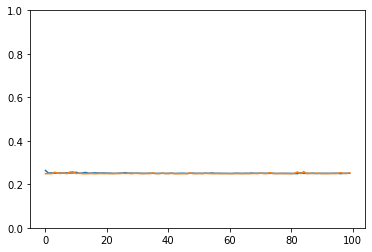

In [31]:
plt.plot(r1_simple.history['loss'], label='Loss')
plt.plot(r1_simple.history['val_loss'], label='Validation Loss')
plt.ylim(0, 1)

We can observe that there is not much pattern picked up by the RNN model. Let's use this "model" to forecast, imagining the situation where we have the true data of previous days and want to predict the next day:

In [32]:
pred1_simple = model1_simple.predict(X[split:])
pred1_simple

array([[0.47303602],
       [0.47195902],
       [0.47066212],
       [0.4732249 ],
       [0.47186133],
       [0.4724585 ],
       [0.47152194],
       [0.47226396],
       [0.47243065],
       [0.47058973],
       [0.47271925],
       [0.4733165 ],
       [0.47113466],
       [0.47342122],
       [0.47063342],
       [0.47295418],
       [0.47326216],
       [0.4722052 ],
       [0.47261733],
       [0.4715619 ],
       [0.47349986],
       [0.4724268 ],
       [0.4715803 ],
       [0.4717507 ],
       [0.47244722],
       [0.4743609 ],
       [0.4706868 ],
       [0.47050086],
       [0.47384068],
       [0.4729662 ],
       [0.46816263],
       [0.47410583],
       [0.4719844 ],
       [0.47216055],
       [0.47357967],
       [0.4713591 ],
       [0.47185785],
       [0.47347814],
       [0.471601  ],
       [0.47189802],
       [0.4731666 ],
       [0.47315276],
       [0.47065076],
       [0.47164747],
       [0.47408074],
       [0.47221926],
       [0.47132534],
       [0.473

All predicts values situate around 0.47, i.e. if 0.5 is the decision threshold, this model will simply predict "sell" at all the days. It would not be a useful prediction.

### LSTM
If SimpleRNN does not work, would a more sophisticated LSTM succeed?

In [33]:
model1_lstm = Sequential([
    Input((T, D)),
    LSTM(5),
    Dense(1, activation='relu')
])

model1_lstm.compile(optimizer=Adam(lr=0.01), loss='mse', metrics=['MeanAbsoluteError'])

In [34]:
r1_lstm = model1_lstm.fit(X[:split], Y[:split], epochs=100, batch_size=25, validation_data=(X[split:], Y[split:]))

Train on 1752 samples, validate on 876 samples
Epoch 1/100
1752/1752 [==============================] - 17s 9ms/sample - loss: 0.2674 - MeanAbsoluteError: 0.4934 - val_loss: 0.2495 - val_MeanAbsoluteError: 0.4960
Epoch 2/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2506 - MeanAbsoluteError: 0.4999 - val_loss: 0.2490 - val_MeanAbsoluteError: 0.4968
Epoch 3/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2532 - MeanAbsoluteError: 0.4975 - val_loss: 0.2494 - val_MeanAbsoluteError: 0.4993
Epoch 4/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2514 - MeanAbsoluteError: 0.4967 - val_loss: 0.2523 - val_MeanAbsoluteError: 0.5016
Epoch 5/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2532 - MeanAbsoluteError: 0.5007 - val_loss: 0.2490 - val_MeanAbsoluteError: 0.4985
Epoch 6/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2505 - MeanAbsoluteError: 0.4989 - val_loss: 0

Epoch 50/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2497 - MeanAbsoluteError: 0.4987 - val_loss: 0.2493 - val_MeanAbsoluteError: 0.4963
Epoch 51/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2506 - MeanAbsoluteError: 0.4983 - val_loss: 0.2489 - val_MeanAbsoluteError: 0.4983
Epoch 52/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2499 - MeanAbsoluteError: 0.4994 - val_loss: 0.2490 - val_MeanAbsoluteError: 0.4986
Epoch 53/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2505 - MeanAbsoluteError: 0.4993 - val_loss: 0.2512 - val_MeanAbsoluteError: 0.5009
Epoch 54/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2507 - MeanAbsoluteError: 0.5002 - val_loss: 0.2489 - val_MeanAbsoluteError: 0.4984
Epoch 55/100
1752/1752 [==============================] - 2s 890us/sample - loss: 0.2502 - MeanAbsoluteError: 0.4990 - val_loss: 0.2492 - val_MeanAbsoluteError: 0.4990
Ep

1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2499 - MeanAbsoluteError: 0.4990 - val_loss: 0.2489 - val_MeanAbsoluteError: 0.4982
Epoch 100/100
1752/1752 [==============================] - 2s 1ms/sample - loss: 0.2500 - MeanAbsoluteError: 0.4994 - val_loss: 0.2492 - val_MeanAbsoluteError: 0.4990


(0.0, 1.0)

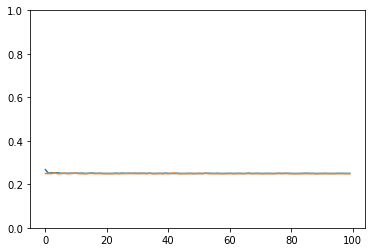

In [35]:
plt.plot(r1_lstm.history['loss'], label='Loss')
plt.plot(r1_lstm.history['val_loss'], label='Validation Loss')
plt.ylim(0, 1)

In [36]:
pred = model1_lstm.predict(X[split:])
pred

array([[0.51566565],
       [0.51564103],
       [0.51507896],
       [0.51523584],
       [0.51502234],
       [0.5152192 ],
       [0.51513827],
       [0.5151239 ],
       [0.51520425],
       [0.514775  ],
       [0.5149945 ],
       [0.51532084],
       [0.51513857],
       [0.5156461 ],
       [0.5150861 ],
       [0.51524943],
       [0.5155268 ],
       [0.5155223 ],
       [0.5157521 ],
       [0.5154117 ],
       [0.5156334 ],
       [0.51559746],
       [0.51538515],
       [0.5152102 ],
       [0.5151141 ],
       [0.5157315 ],
       [0.5153831 ],
       [0.514955  ],
       [0.5152353 ],
       [0.5153076 ],
       [0.5144361 ],
       [0.5150656 ],
       [0.5148421 ],
       [0.5150607 ],
       [0.5157566 ],
       [0.51542115],
       [0.5153416 ],
       [0.51555496],
       [0.5152607 ],
       [0.51525825],
       [0.5154703 ],
       [0.51566696],
       [0.51528054],
       [0.5150726 ],
       [0.5154261 ],
       [0.51541376],
       [0.51535046],
       [0.515

Although the prediction is hovering around 0.51, i.e. outputing 'buy' for all timesteps, the usefulness has no difference with the SimpleRNN model. It is to conclude that this pure %change data does not work.

## Method 2: OHLC Data
OHLC stands for Open, High, Low and Close. In machine learning, regression prediction is a harder job compared to classification because of the difficulty to predict continuous value and to analyse the results, e.g. accuracy. Therefore, the target will be transformed into a daily return direction, namely positive (1) or negative (0).

In addition, in finance, the value of the index does not carry much prediction power per se. Thus the high, low and open data will be transformed into proportions to close.

One extra column on daily returns will be added.

In [ ]:
df2 = df.copy()

In [ ]:
df2['return'] = (df2['Close'] / df2.shift(1)['Close']) - 1

In [ ]:
df2['target'] = np.sign(df2['return']).apply(lambda x: 0 if x == -1.0 else x)

In [ ]:
for col in ['Open', 'High', 'Low']:
    df2[col] = df2[col] / df2['Close'] - 1

In [ ]:
df2.dropna(inplace=True)
df2.drop('Close', axis=1, inplace=True)

In [ ]:
df2

### Define features and target

In [ ]:
df2x = df2.drop('target', axis=1)
df2y = df2['target']

In [ ]:
T = 20
D = 5
N = len(df2) - T

np.array(df2x.iloc[0:10])